# LMS Project1 : Revenue Grid Prediction for Bank Dataset 

###### Problem statement :
    1. only 10% customer do enough trade after discount to be profitable 
    2.company want to identify which are those 10% customer , so that they can offer disount selectively 
    

###### Observations of dataset :
    1. this dataset has different data of customer of 6 months period 
    2.customers are devided in grid 1 & 2 basis of nnetworth 
    3.bank want to incentivse customer by offering discount on commission
    4. only 10% customer trade enough for bank to make profit
    5. model to be evaluated based on F1 score 
    6.high networth is grid 1, low networth is grid 2.
    
    
    

###### Dataset Feature Description
The Dataset contains the following columns:

Column Name	Description
REF_NO	Reference Number of the customer.
children	Number of children each customer has.
Age_band	Age Group to which the customer belongs.
status	Marital Status of the customer.
occupation	Job or profession of the customer.
occupation_partner	Job or profession of the customer's partner.
home_status	Home Status of the customers.
family_income	Income Range of the customer's family.
self_employed	Whether self-employed or not.
self_employed_partner	Whether the partner self-employed or not.
year_last_moved	Moving Year from the last location of the customer.
TVarea	Television Region of the customer.
post_code	Postal Code of the customer.
post_area	Postal Area of the customer.
Average_Credit_Card_Transaction	Average Credit Card Transaction per year by the customer.
Balance_Transfer	Transfer of the Balance in an account to another account by the customer.
Term_Deposit	Cash Investment Help at Financial Institute provided to the customer.
Life_Insurance	Basic Life Insurance Coverage of the customer.
Medical_Insurance	Medical Insurance Coverage of the customer.
Average_A/C_Balance	Average Balance in the account of the customer.
Personal_Loan	Amount of Personal Loan taken by the customer.
Investment_in_Mutual_Fund	Amount Invested in Mutual Funds by the customer.
Investment_Tax_Saving_Bond	Amount Invested in Tax Saving Bond by the customer.
Home_Loan	Amount of Home Loan taken by the customer.
Online_Purchase_Amount	Amount spent by the customer on online purchases.
gender	Gender of the customer.
region	Religion of the customer.
Investment_in_Commudity	Amount Invested in Commodity by the customer.
Investment_in_Equity	Amount Invested in Equity by the customer.
Investment_in_Derivative	Amount Invested in Derivatives by the customer.
Portfolio_Balance	Balanced Investment Strategy of the customer.
Revenue_Grid	Grid report of the customers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
R_grid = pd.read_csv('C:/Users/virendra.dubey/Desktop/INSAD training/ML _vkd/LMS project/base_train.csv')


In [3]:
test = pd.read_csv('C:/Users/virendra.dubey/Desktop/INSAD training/ML _vkd/LMS project/base_test.csv')

In [4]:
R_grid.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [5]:
R_grid.shape

(8124, 32)

In [6]:
R_grid.skew()

C:\Users\VIREND~1.DUB\AppData\Local\Temp/ipykernel_5352/1490769447.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  R_grid.skew()


REF_NO                             -0.012803
year_last_moved                   -10.639671
Average_Credit_Card_Transaction     3.761152
Balance_Transfer                    8.173734
Term_Deposit                        4.174163
Life_Insurance                      5.509379
Medical_Insurance                   3.361940
Average_A/C_Balance                 2.689985
Personal_Loan                      26.159596
Investment_in_Mutual_Fund           9.667247
Investment_Tax_Saving_Bond          3.191713
Home_Loan                           3.977657
Online_Purchase_Amount             21.763954
Investment_in_Commudity             4.816122
Investment_in_Equity               11.524906
Investment_in_Derivative           12.462312
Portfolio_Balance                   8.895472
Revenue_Grid                       -2.562680
dtype: float64

In [5]:
R_grid.isna().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
gender                             0
region                             0
I

In [7]:
R_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [8]:
R_grid['Personal_Loan'].max()

4905.93

In [9]:
R_grid.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [10]:
R_grid['region'].value_counts()

South East          1680
North West          1517
Unknown              866
South West           769
West Midlands        658
East Midlands        623
Scotland             615
North                460
Wales                437
East Anglia          344
Northern Ireland     135
Isle of Man           15
Channel Islands        5
Name: region, dtype: int64

(array([2286.,  615.,  866.,  135.,  658., 2303.,  460.,  344.,  437.,
          20.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

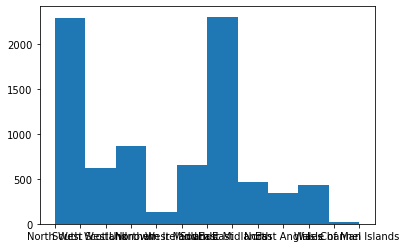

In [11]:
plt.hist(R_grid['region'])

Text(0.5, 1.0, 'My Bar Graph and Line Chart Combined')

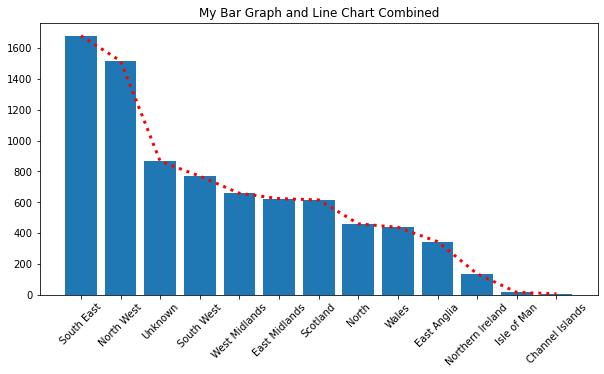

In [12]:
plt.figure(figsize = (10,5))
plt.bar(x = R_grid['region'].value_counts().index, height = R_grid['region'].value_counts())
plt.plot(R_grid['region'].value_counts().index, R_grid['region'].value_counts(), color = 'Red', ls = ':', lw = 3)
plt.xticks(rotation = 45)
plt.title("My Bar Graph and Line Chart Combined")

Text(0.5, 1.0, 'Agre group bar chart ')

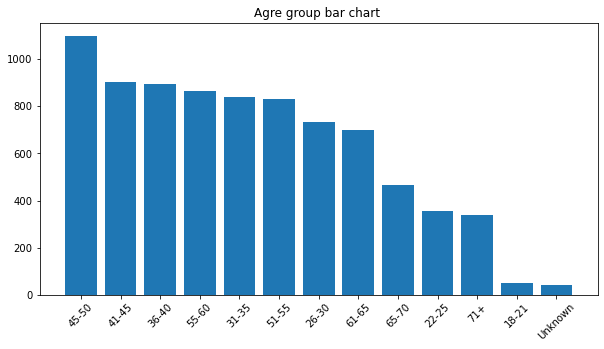

In [13]:
plt.figure(figsize = (10,5))
plt.bar(x = R_grid['age_band'].value_counts().index, height = R_grid['age_band'].value_counts())
plt.xticks(rotation = 45)
plt.title("Agre group bar chart ")

Text(0.5, 1.0, 'occupation bar chart ')

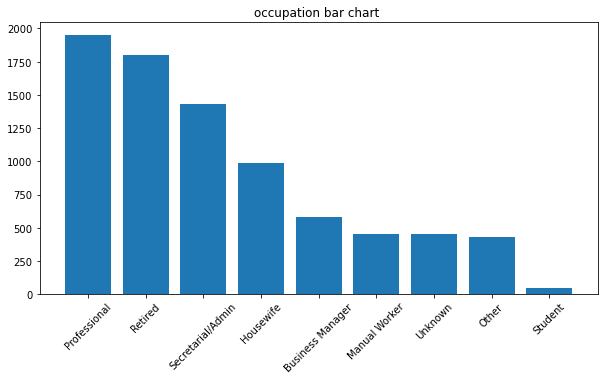

In [32]:
plt.figure(figsize = (10,5))
plt.bar(x = R_grid['occupation'].value_counts().index, height = R_grid['occupation'].value_counts())
plt.xticks(rotation = 45)
plt.title("occupation bar chart ")

In [14]:
R_grid.corr()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,1.000000,0.026152,-0.003218,-0.006604,0.003851,0.010882,0.019814,-0.003665,-0.008298,-0.003864,0.006365,-0.016627,0.004514,0.005642,-0.004075,0.002685,0.002762,-0.019852
year_last_moved,0.026152,1.000000,0.014315,0.013267,0.006197,0.010292,0.012969,0.007945,0.017261,0.000847,0.013398,0.006490,0.010721,0.016565,0.016056,0.014580,0.017924,-0.019630
Average_Credit_Card_Transaction,-0.003218,0.014315,1.000000,0.122762,0.317612,0.142606,0.416773,0.178150,0.089357,0.147438,0.131641,0.103417,0.135466,0.494653,0.208564,0.227267,0.334657,-0.260559
Balance_Transfer,-0.006604,0.013267,0.122762,1.000000,0.225434,0.579267,0.162104,0.364480,0.390466,0.476061,0.152481,0.155322,0.103240,0.745051,0.482565,0.603648,0.655522,-0.068647
Term_Deposit,0.003851,0.006197,0.317612,0.225434,1.000000,0.277802,0.509060,0.274553,0.141514,0.200841,0.181591,0.179143,0.102339,0.617357,0.263169,0.348750,0.451947,-0.017412
Life_Insurance,0.010882,0.010292,0.142606,0.579267,0.277802,1.000000,0.231832,0.507877,0.411186,0.557926,0.257747,0.281339,0.117841,0.806732,0.572773,0.845890,0.792836,-0.201998
Medical_Insurance,0.019814,0.012969,0.416773,0.162104,0.509060,0.231832,1.000000,0.266829,0.101725,0.202282,0.215206,0.144905,0.149324,0.545814,0.267200,0.382948,0.433584,-0.102217
Average_A/C_Balance,-0.003665,0.007945,0.178150,0.364480,0.274553,0.507877,0.266829,1.000000,0.193468,0.437742,0.302556,0.377556,0.160302,0.517854,0.580203,0.637153,0.599855,-0.114258
Personal_Loan,-0.008298,0.017261,0.089357,0.390466,0.141514,0.411186,0.101725,0.193468,1.000000,0.424295,0.224014,0.125360,0.079820,0.403742,0.685400,0.703672,0.618259,0.022841
Investment_in_Mutual_Fund,-0.003864,0.000847,0.147438,0.476061,0.200841,0.557926,0.202282,0.437742,0.424295,1.000000,0.253396,0.254454,0.091961,0.546054,0.695245,0.774477,0.704382,-0.110020


In [15]:
R_grid.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [16]:
R_grid.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [17]:
def plotBarChart(data=None, column=None, xlabel=None):
  """Creates bar chart depicting frequency distribution of categorical features."""

  # Create a figure size of 15 X 7 inches.
  figure = plt.figure(figsize=[10, 10])

  # Using pandas .plot.bar() function for barplot
  data[column].value_counts().plot.bar()

  # Changning x-ticks to 0 degree
  plt.xticks(rotation=90)

  # Set x, y labels of size 14 and title label of size 16.
  plt.xlabel(xlabel=xlabel, size=8)
  plt.ylabel(ylabel='Frequency', size=14)
  plt.title(label='Frequency Distribution of '+column, size=16)

  # Display the output
  plt.show()

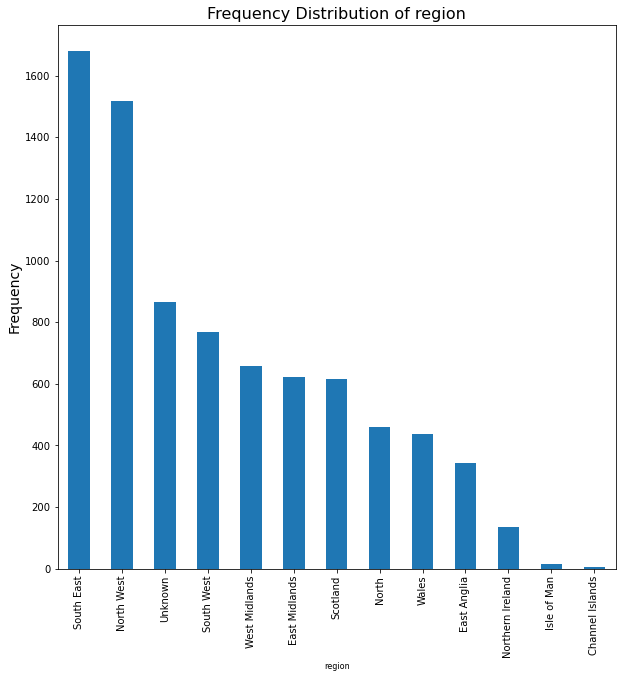

In [18]:
plotBarChart(data=R_grid, column='region', xlabel='region')

<AxesSubplot:>

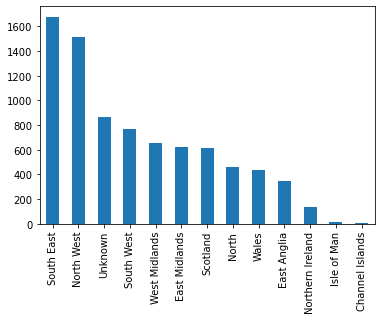

In [19]:
R_grid['region'].value_counts().plot.bar()

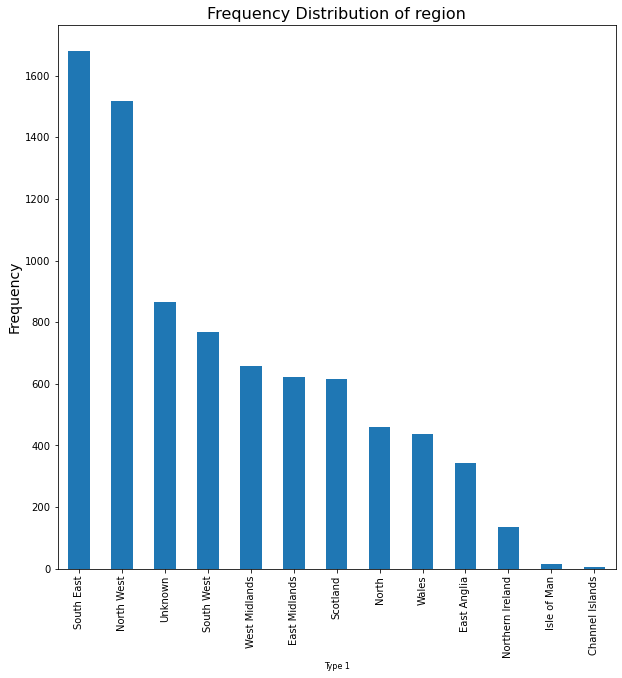

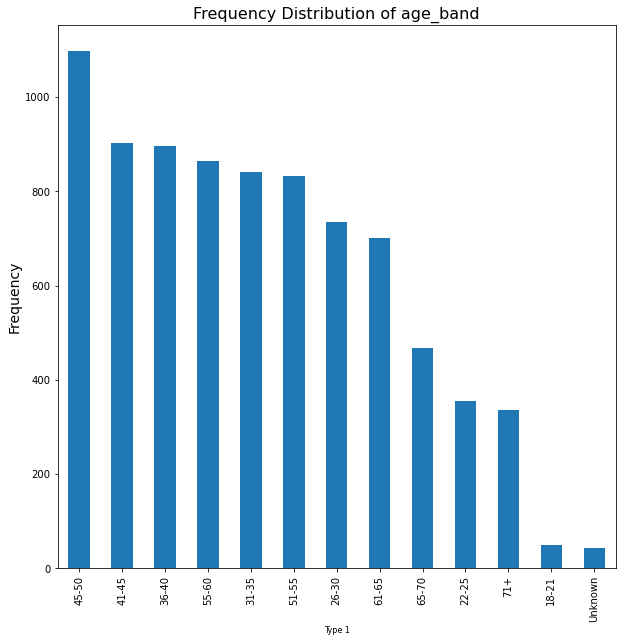

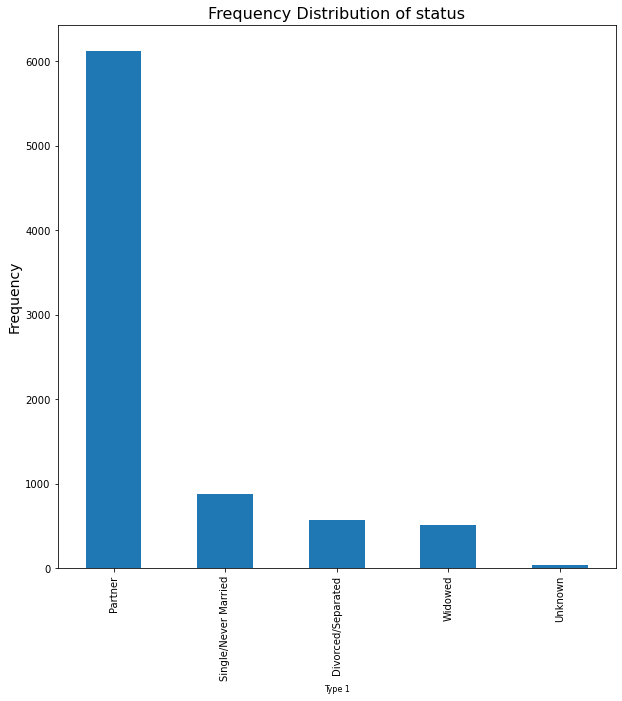

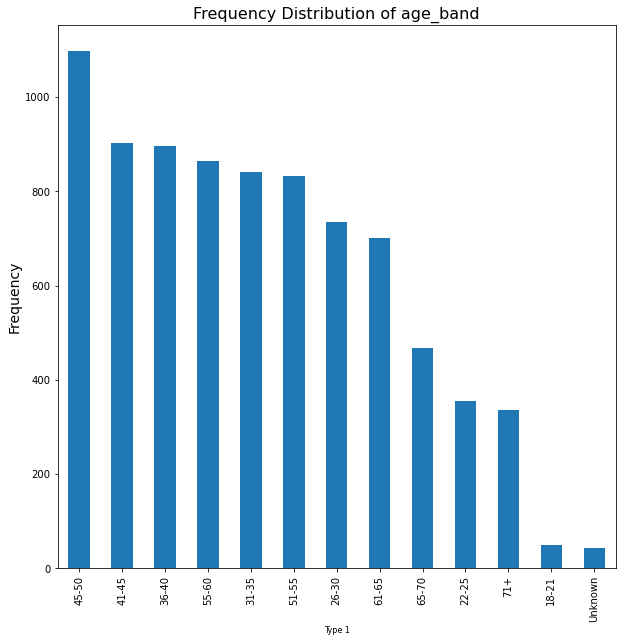

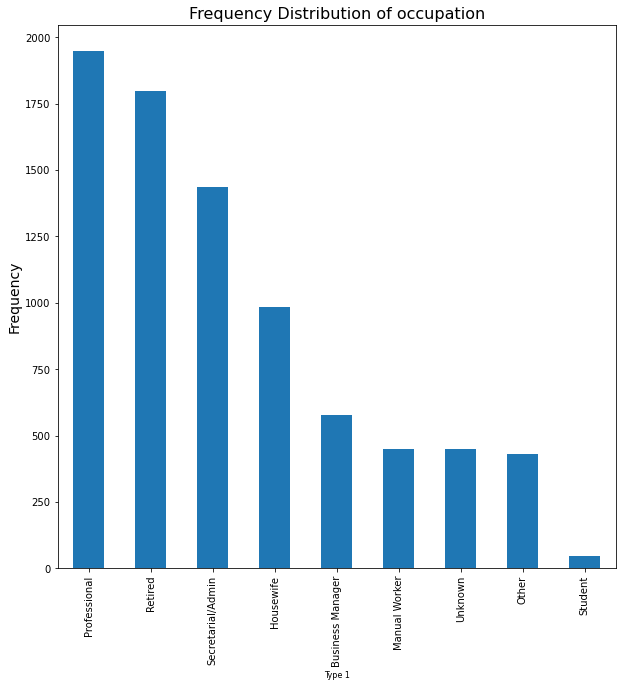

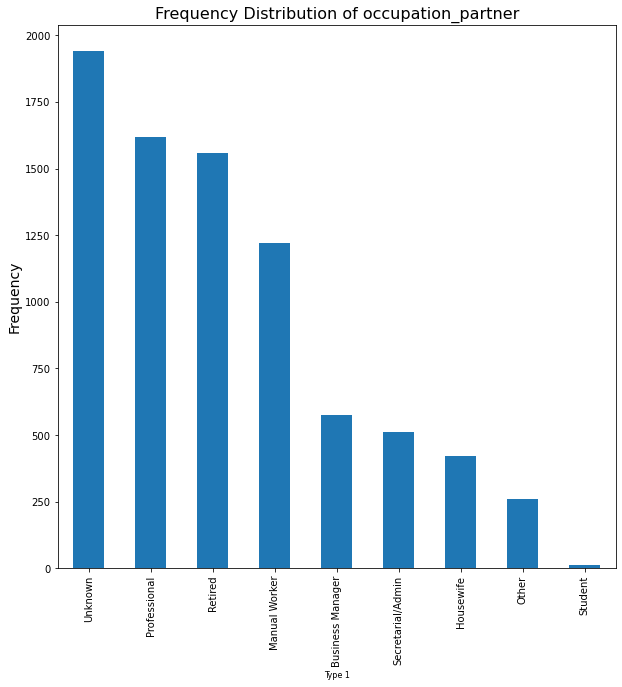

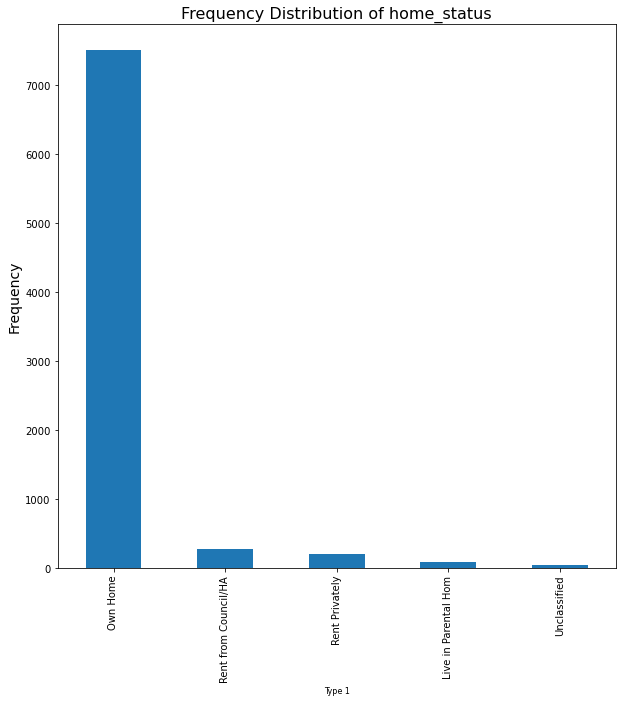

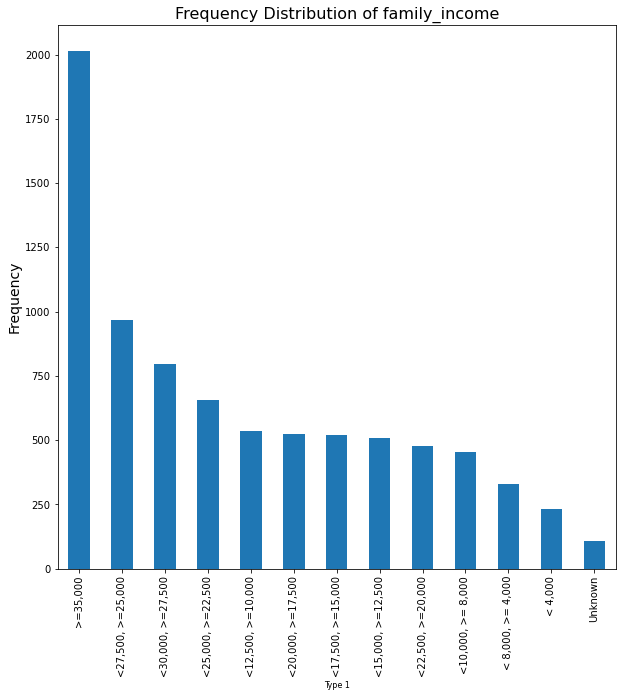

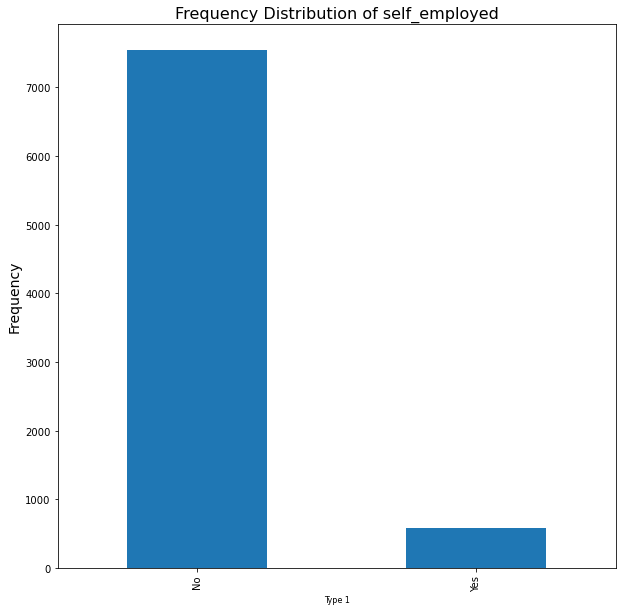

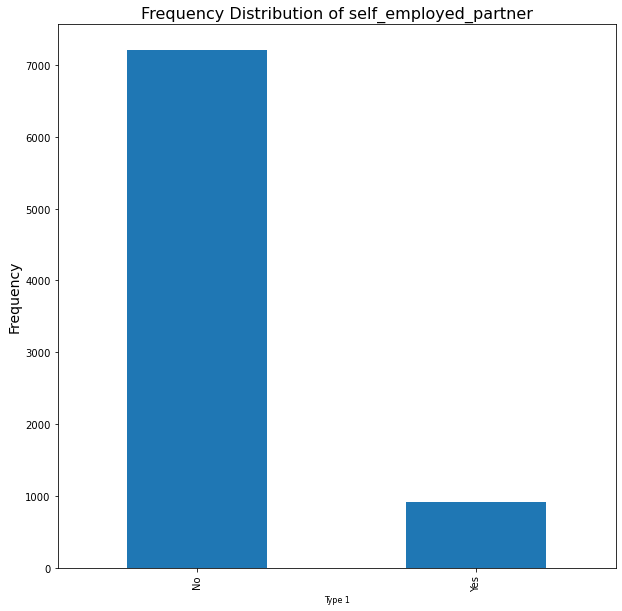

In [20]:
plotBarChart(data=R_grid, column='region', xlabel='Type 1')
plotBarChart(data=R_grid, column='age_band', xlabel='Type 1')
plotBarChart(data=R_grid, column='status', xlabel='Type 1')
plotBarChart(data=R_grid, column='age_band', xlabel='Type 1')
plotBarChart(data=R_grid, column='occupation', xlabel='Type 1')
plotBarChart(data=R_grid, column='occupation_partner', xlabel='Type 1')
plotBarChart(data=R_grid, column='home_status', xlabel='Type 1')
plotBarChart(data=R_grid, column='family_income', xlabel='Type 1')
plotBarChart(data=R_grid, column='self_employed', xlabel='Type 1')
plotBarChart(data=R_grid, column='self_employed_partner', xlabel='Type 1')


In [21]:
R_grid.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

C:\Users\virendra.dubey\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


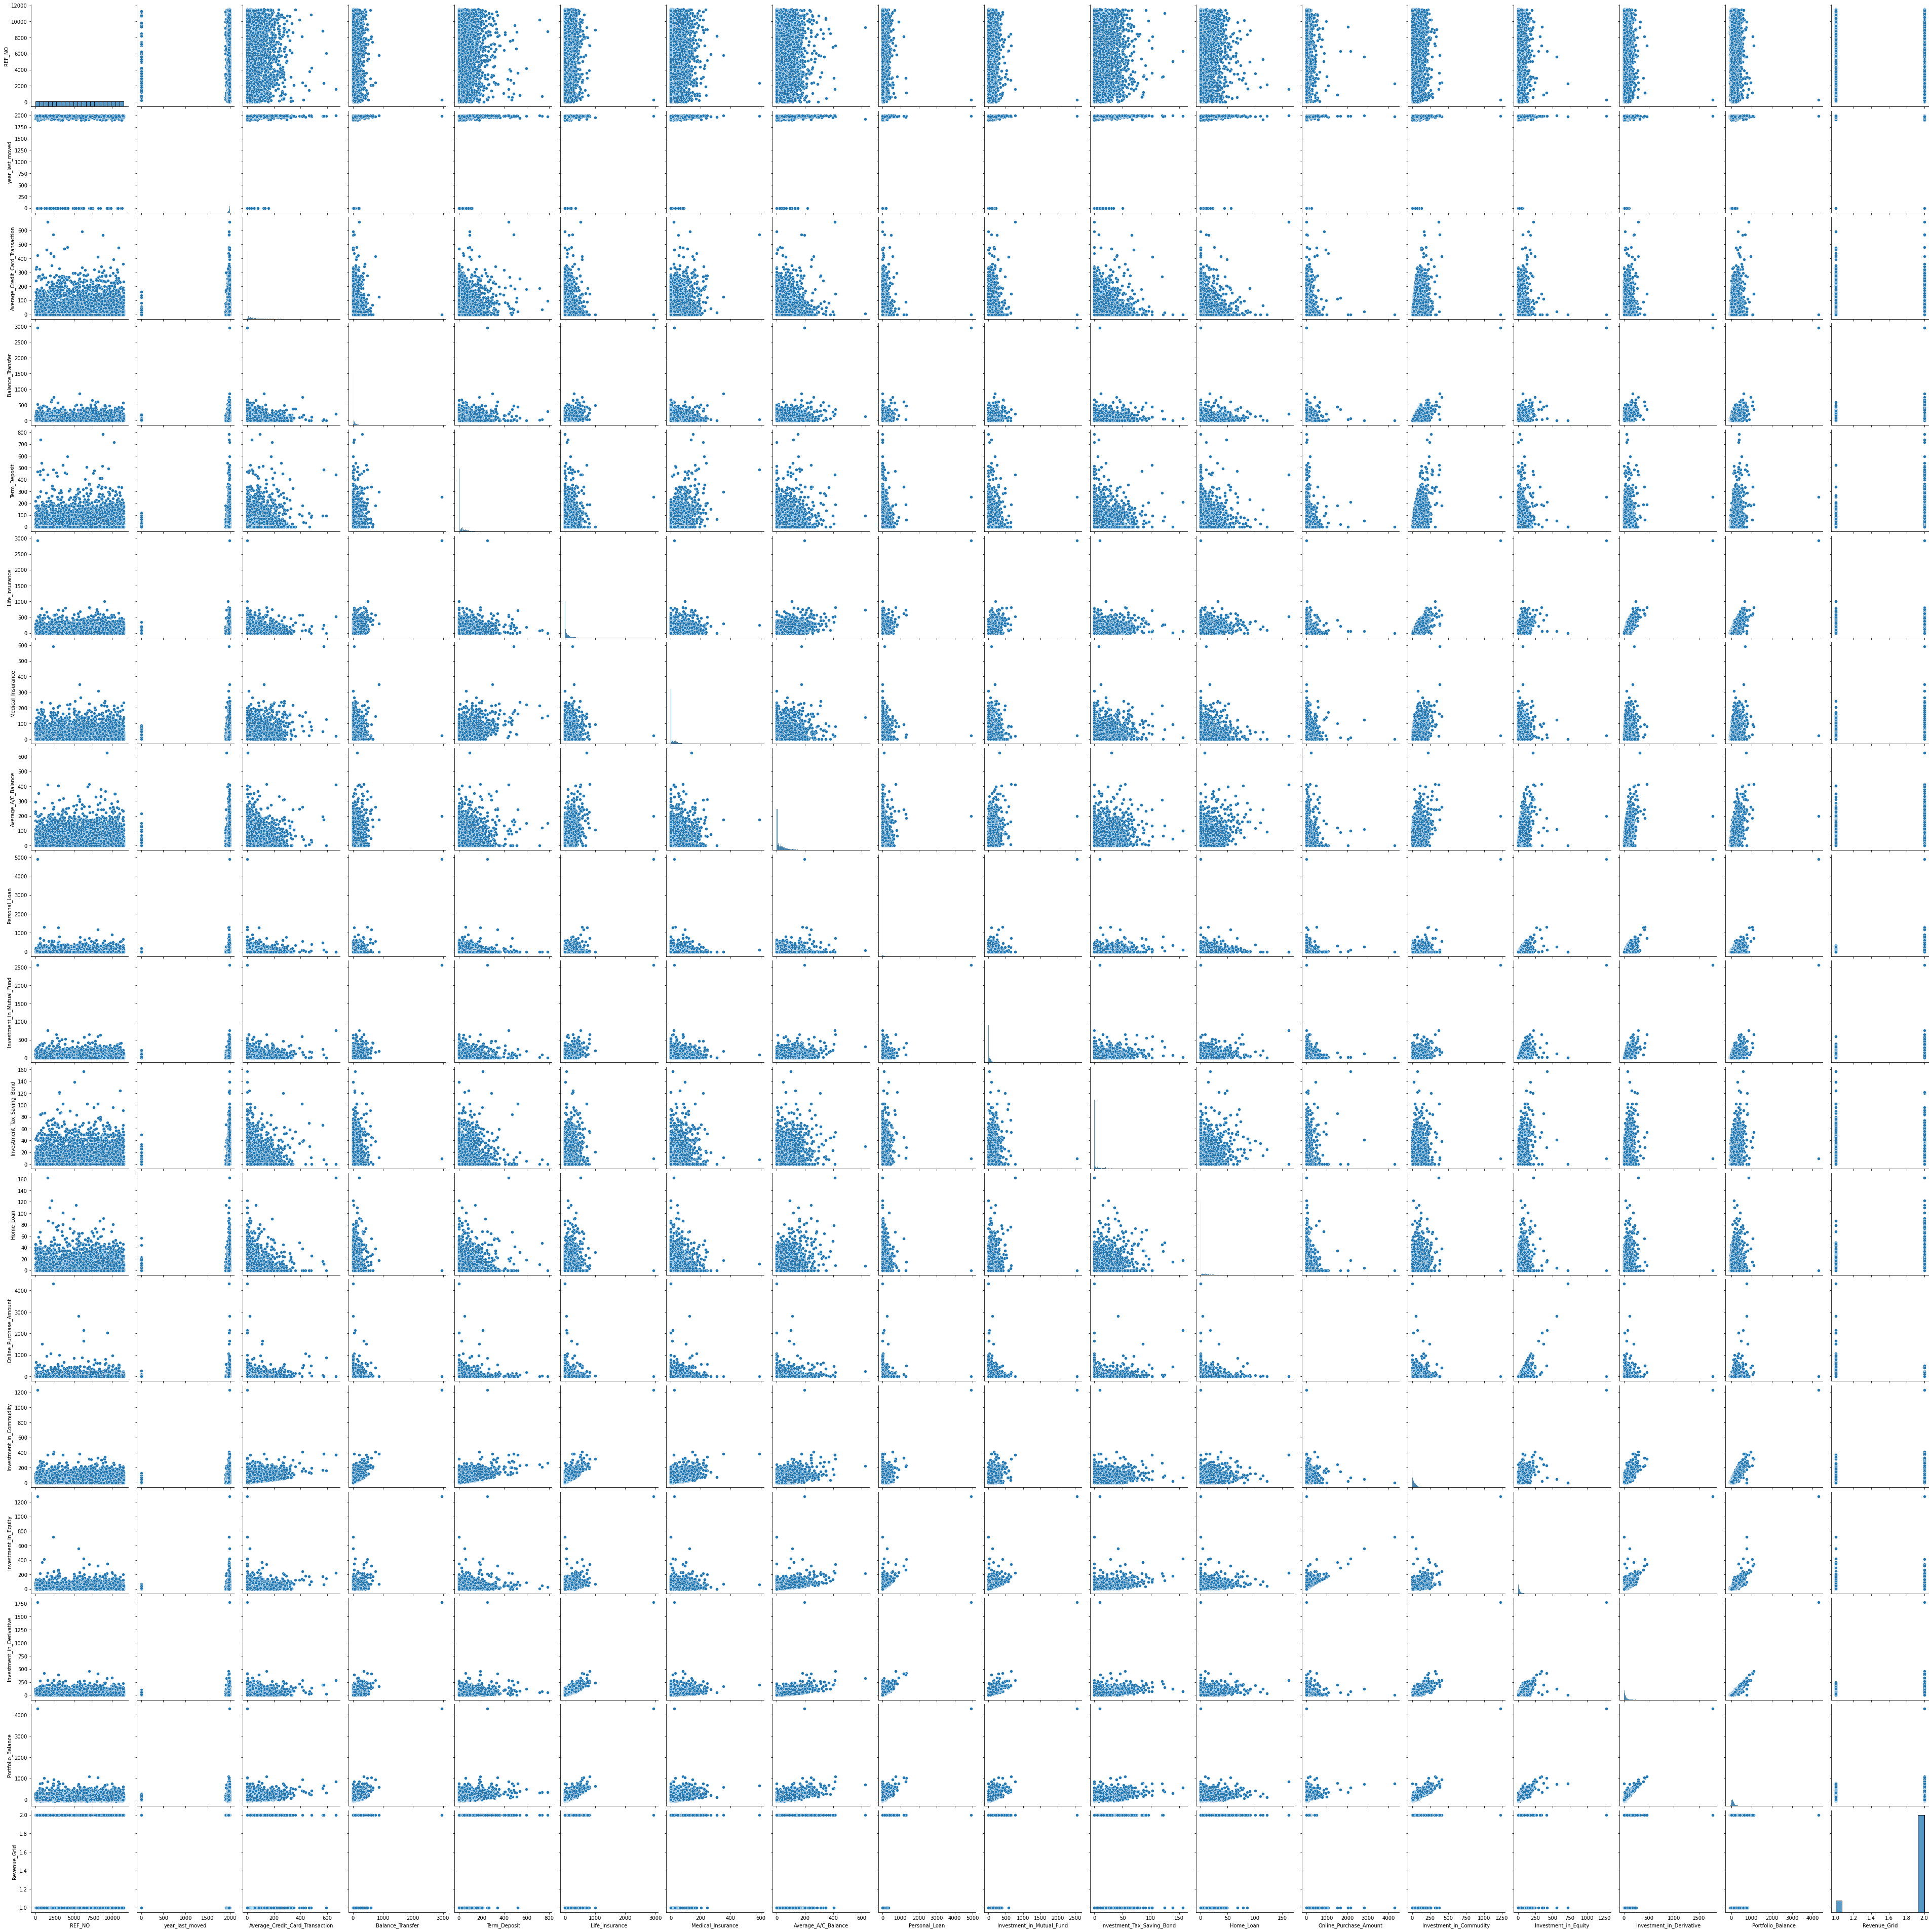

In [22]:
sns.pairplot(R_grid, size = 3)

<AxesSubplot:>

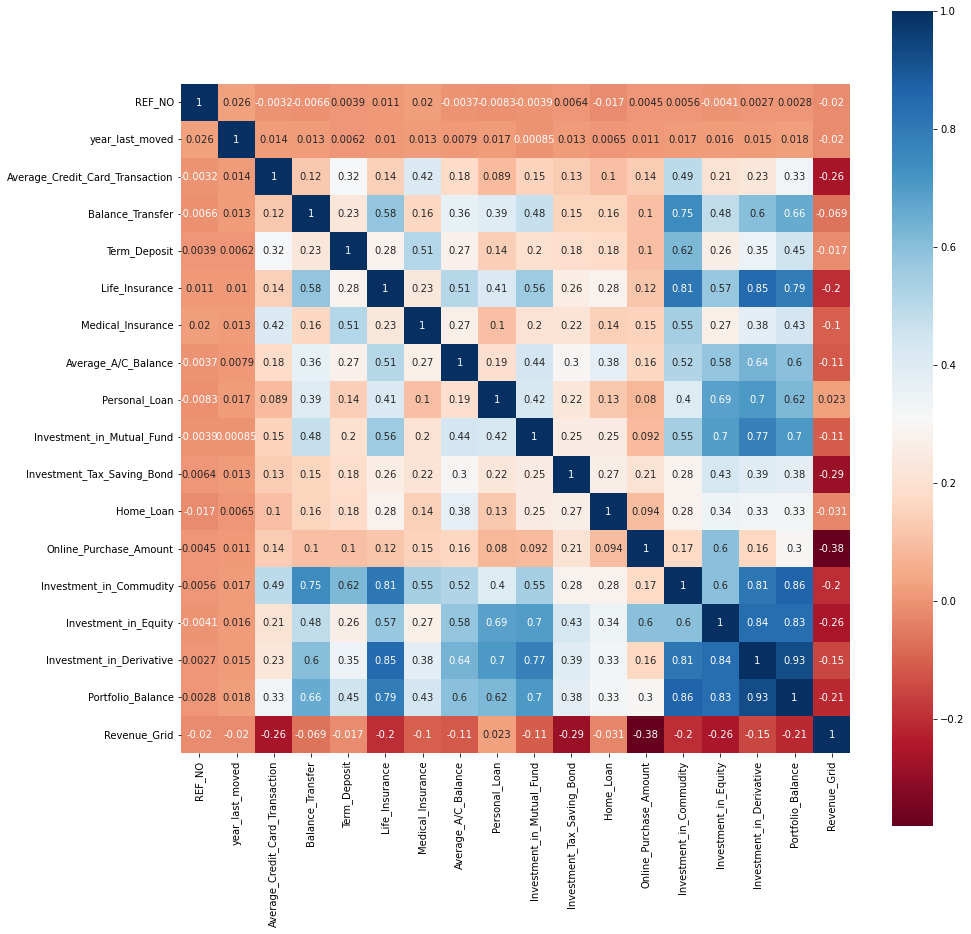

In [23]:
plt.figure(figsize = (15,15))
sns.heatmap(R_grid.corr(), annot = True, cmap = 'RdBu', square = True)

In [24]:
R_grid.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


###### NOW : to do EDA on this data , we have to apply one HOT encoding ,so that categorical variable can be converted in numeric , for using this in heat map to find the corelation
    

##### onhot /level encoding

###### Level encoding nfor categorical variables

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lc = LabelEncoder()

In [9]:
R_grid['age_band'] = lc.fit_transform(R_grid['age_band'])
R_grid['status'] = lc.fit_transform(R_grid['status'])
R_grid['occupation'] = lc.fit_transform(R_grid['occupation'])
R_grid['occupation_partner'] = lc.fit_transform(R_grid['occupation_partner'])
R_grid['home_status'] = lc.fit_transform(R_grid['home_status'])
R_grid['family_income'] = lc.fit_transform(R_grid['family_income'])
R_grid['self_employed'] = lc.fit_transform(R_grid['self_employed'])
R_grid['self_employed_partner'] = lc.fit_transform(R_grid['self_employed_partner'])
R_grid['gender'] = lc.fit_transform(R_grid['gender'])
R_grid['region'] = lc.fit_transform(R_grid['region'])
R_grid['TVarea'] = lc.fit_transform(R_grid['TVarea'])
R_grid['post_code'] = lc.fit_transform(R_grid['post_code'])
R_grid['post_area'] = lc.fit_transform(R_grid['post_area'])
R_grid['children'] = lc.fit_transform(R_grid['children'])


In [10]:
R_grid.head(5)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,1,3,1,4,4,1,11,0,0,...,8.98,55.44,7.68,0,5,151.55,81.79,136.02,360.37,2
1,9091,4,6,1,6,4,1,11,0,0,...,0.00,0.00,18.99,0,5,44.28,13.91,29.23,89.22,2
2,9744,0,4,1,2,2,2,7,1,1,...,0.00,0.00,0.00,0,9,8.58,1.75,4.82,14.50,2
3,10700,1,3,1,2,2,1,8,0,0,...,0.00,0.00,0.00,0,7,15.00,0.00,5.00,68.98,2
4,1987,4,8,1,1,4,1,11,0,0,...,0.00,0.00,0.00,0,10,0.00,1.66,1.66,1.88,2


In [37]:
R_grid['family_income'].value_counts()

11    2014
9      969
10     796
8      656
3      535
6      525
5      521
4      508
7      479
2      452
1      328
0      233
12     108
Name: family_income, dtype: int64

In [11]:
R_grid.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [12]:
df=R_grid.drop(labels=['children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance',],axis=1)

In [90]:
#df.to_csv('C:\Users\virendra.dubey\Desktop\INSAD training\ML _vkd\LMS project')

In [13]:
X = R_grid.drop(labels=['REF_NO', 'year_last_moved','Revenue_Grid'], axis=1)
Y = R_grid['Revenue_Grid']

##### Train _Test Split 

In [14]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.10, random_state = 2018)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7311, 29)
(813, 29)
(7311,)
(813,)


##### Building MOdel :Decision Tree

In [16]:
dtree = DecisionTreeClassifier(random_state=123)
dtree.fit(x_train, y_train)
preds_dtree = dtree.predict(x_test)

In [17]:
preds_dtree.shape

(813,)

##### Tessting Accurecy of DS Tree Model

In [18]:
acc_dtree = accuracy_score(y_test, preds_dtree)
cm_dtree = confusion_matrix(y_test, preds_dtree)
clas_report = classification_report(y_test, preds_dtree)
print('Accuracy of the model is: ', acc_dtree)
print(cm_dtree)
print(clas_report)

Accuracy of the model is:  0.9532595325953259
[[ 69  22]
 [ 16 706]]
              precision    recall  f1-score   support

           1       0.81      0.76      0.78        91
           2       0.97      0.98      0.97       722

    accuracy                           0.95       813
   macro avg       0.89      0.87      0.88       813
weighted avg       0.95      0.95      0.95       813



#### Observation : accurecy in descion tree model is low 95% only so we shall explore if acc inceases in other model 

#### finding out imporatance facors on feature 

In [19]:
importance = dtree.feature_importances_

In [62]:
importance

array([0.00290244, 0.01077595, 0.00122796, 0.00634065, 0.00502273,
       0.00061398, 0.01274634, 0.00037251, 0.        , 0.00731034,
       0.00955462, 0.00419472, 0.095213  , 0.00953547, 0.07569677,
       0.05666993, 0.00800262, 0.0288544 , 0.0511673 , 0.02887846,
       0.09376611, 0.01915057, 0.36996121, 0.        , 0.00194411,
       0.01850463, 0.05176063, 0.02691071, 0.00292184])

Feature: 0, Score: 0.00290
Feature: 1, Score: 0.01078
Feature: 2, Score: 0.00123
Feature: 3, Score: 0.00634
Feature: 4, Score: 0.00502
Feature: 5, Score: 0.00061
Feature: 6, Score: 0.01275
Feature: 7, Score: 0.00037
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00731
Feature: 10, Score: 0.00955
Feature: 11, Score: 0.00419
Feature: 12, Score: 0.09521
Feature: 13, Score: 0.00954
Feature: 14, Score: 0.07570
Feature: 15, Score: 0.05667
Feature: 16, Score: 0.00800
Feature: 17, Score: 0.02885
Feature: 18, Score: 0.05117
Feature: 19, Score: 0.02888
Feature: 20, Score: 0.09377
Feature: 21, Score: 0.01915
Feature: 22, Score: 0.36996
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00194
Feature: 25, Score: 0.01850
Feature: 26, Score: 0.05176
Feature: 27, Score: 0.02691
Feature: 28, Score: 0.00292


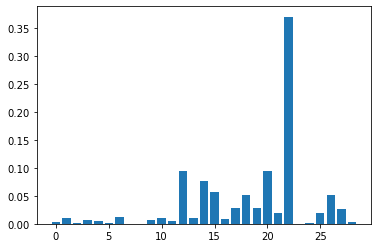

In [63]:

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Building :Randor forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(x_train, y_train)
preds_rf = rf.predict(x_test)

In [22]:
accuracy_score_rf = accuracy_score(y_test, preds_rf)
confusion_matrix_rf = confusion_matrix(y_test, preds_rf)
classification_report_rf = classification_report(y_test, preds_rf)
print('Accuracy score for Random Forest is: ', accuracy_score_rf)
print(confusion_matrix_rf)
print(classification_report_rf)

Accuracy score for Random Forest is:  0.9630996309963099
[[ 65  26]
 [  4 718]]
              precision    recall  f1-score   support

           1       0.94      0.71      0.81        91
           2       0.97      0.99      0.98       722

    accuracy                           0.96       813
   macro avg       0.95      0.85      0.90       813
weighted avg       0.96      0.96      0.96       813



#### Observation : accurecy has improved in randome forest Model so for this we will use randome forest model 

### Now since out model is ready ....we can caryout prediction.... on test data.
### However EDA must be performed oin test data before taking on model


#### EDA on test dataset 

In [23]:
test.isna().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
gender                             0
region                             0
I

##### Observation : There is no NAN value in test data 

In [22]:
test.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
count,2031.000000,2031.000000,2031.000000,2031.00000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000,2031.000000
mean,5664.780896,1970.374200,24.204407,47.75711,28.760660,69.938897,20.405470,33.072733,28.366696,44.803978,6.331369,4.742354,19.019227,38.213437,22.723570,33.820625,94.887715
std,3332.892962,170.457726,49.760499,76.00507,53.219266,94.604936,34.094857,46.421372,80.744969,61.741147,13.456798,10.127166,78.066618,41.412048,30.364114,37.525384,102.915537
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.070000
25%,2816.500000,1979.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.195000,4.830000,8.830000,28.330000
50%,5575.000000,1988.000000,0.000000,19.47000,0.000000,34.490000,4.490000,17.970000,0.000000,23.980000,0.000000,0.000000,0.000000,25.590000,13.470000,22.560000,68.530000
75%,8572.500000,1994.000000,24.490000,69.71000,35.970000,100.680000,29.470000,48.950000,24.875000,63.930000,5.990000,4.990000,8.985000,54.215000,29.895000,46.210000,131.345000
max,11516.000000,1999.000000,390.880000,858.78000,531.800000,825.020000,296.010000,616.170000,1645.380000,561.540000,123.340000,122.670000,1407.450000,348.970000,434.150000,533.980000,1109.570000


In [23]:
test.skew()

C:\Users\VIREND~1.DUB\AppData\Local\Temp/ipykernel_5352/1515727625.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


REF_NO                              0.023930
year_last_moved                   -11.422799
Average_Credit_Card_Transaction     3.009489
Balance_Transfer                    2.865656
Term_Deposit                        3.260550
Life_Insurance                      2.442138
Medical_Insurance                   2.827709
Average_A/C_Balance                 3.101115
Personal_Loan                       8.832275
Investment_in_Mutual_Fund           2.651455
Investment_Tax_Saving_Bond          3.362666
Home_Loan                           3.551578
Online_Purchase_Amount             10.386710
Investment_in_Commudity             2.086524
Investment_in_Equity                4.250351
Investment_in_Derivative            3.167334
Portfolio_Balance                   2.282273
dtype: float64

##### Observation : personal loan, year_last moved,online purchase acouts are highly skewed data 

#### aplying level encoding on test data 

In [57]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lc = LabelEncoder()

In [25]:
test['age_band'] = lc.fit_transform(test['age_band'])
test['status'] = lc.fit_transform(test['status'])
test['occupation'] = lc.fit_transform(test['occupation'])
test['occupation_partner'] = lc.fit_transform(test['occupation_partner'])
test['home_status'] = lc.fit_transform(test['home_status'])
test['family_income'] = lc.fit_transform(test['family_income'])
test['self_employed'] = lc.fit_transform(test['self_employed'])
test['self_employed_partner'] = lc.fit_transform(test['self_employed_partner'])
test['gender'] = lc.fit_transform(test['gender'])
test['region'] = lc.fit_transform(test['region'])
test['TVarea'] = lc.fit_transform(test['TVarea'])
test['post_code'] = lc.fit_transform(test['post_code'])
test['post_area'] = lc.fit_transform(test['post_area'])
test['children'] = lc.fit_transform(test['children'])


In [26]:
test1 = test.drop(labels=['REF_NO', 'year_last_moved'], axis=1)

In [27]:
test1.head(5)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,4,11,1,5,1,1,3,0,0,7,...,45.97,0.00,0.00,0.00,1,8,40.48,15.07,28.40,83.05
1,4,3,1,8,0,1,11,0,0,0,...,133.88,27.45,13.47,57.46,1,7,27.07,72.01,82.74,235.29
2,4,11,1,1,5,1,4,0,0,6,...,107.88,0.00,0.00,0.00,0,8,44.39,32.62,43.86,98.38
3,0,1,1,3,3,1,5,0,0,4,...,44.96,0.00,0.00,0.00,0,6,21.59,24.57,29.23,86.32
4,4,10,4,5,8,1,0,0,0,7,...,33.96,6.99,17.93,5.45,0,7,53.66,16.22,32.89,102.99


In [28]:
test1.shape

(2031, 29)

##### applying Model on encoded test dataset 

In [29]:
preds_rf_test = rf.predict(test1)

In [30]:
x=preds_rf_test

In [31]:
test.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

In [36]:
test['output']=pd.DataFrame(x)

In [37]:
test['output']

0       2
1       2
2       2
3       2
4       2
       ..
2026    2
2027    2
2028    2
2029    1
2030    2
Name: output, Length: 2031, dtype: int64

In [86]:
test['REF_NO']

0        697
1       7897
2       4729
3       6914
4       2795
        ... 
2026    4952
2027    7348
2028    3903
2029    4767
2030    5208
Name: REF_NO, Length: 2031, dtype: int64

In [38]:
df2=pd.concat([test['REF_NO'],test['output']],axis = 1)

In [39]:
df2.head(5)

,REF_NO,output
0,697,2
1,7897,2
2,4729,2
3,6914,2
4,2795,2


In [44]:
df2.to_csv('Revenue_Grid_output.csv',index=False,header=False)

In [43]:
df2.tail(5)

,REF_NO,output
2026,4952,2
2027,7348,2
2028,3903,2
2029,4767,1
2030,5208,2


#### Observation : final outpur file procuced which has predicted output on test dataset 

## Result : Model sucessfully created with 96% accurecy and prediction for Revenue Grid carried out on test dataset 